# Handling and Removing Outliers

*Definition:*

Outliers: Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or experimental errors.

Handling Outliers: This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models.

*Use Case in Real Life:*

Financial Data Analysis: Identify and remove outliers in financial transaction data to prevent fraudulent activities and improve the accuracy of financial models.

Customer Data Management: Clean customer data by handling outliers in age, income, and spending to create accurate customer segments and improve marketing strategies.

Health Data Analysis: Detect and handle outliers in patient health records, such as blood pressure and cholesterol levels, to ensure accurate diagnoses and treatment plants.

# Loading the Dataset

In [5]:
import pandas as pd

#Load the dataset
df = pd.read_csv('outliers_data.csv')
print(df)

      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering


# Visualizing Outliers using Boxplots

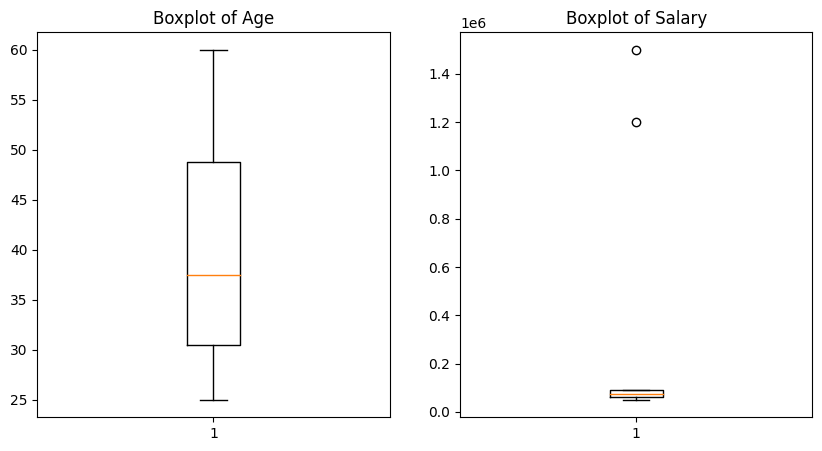

In [6]:
import matplotlib.pyplot as plt

#Boxplot to visualize outliers in the Age column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')

#Boxplot to visualize the outliers in Salary column
plt.subplot(1,2,2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')
plt.show()

# Handling Outliers - Capping Outliers

In [7]:
#Capping the outliers using IQR method
df_capped = df.copy()

for column in ['Age','Salary']:
  Q1 = df_capped[column].quantile(0.25)
  Q3 = df_capped[column].quantile(0.75)
  IQR = Q3 - Q1
  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR
  df_capped[column] = df_capped[column].apply(lambda x: Upper_bound if x > Upper_bound else Lower_bound if x < Lower_bound else x)

  print('Data after capping the outliers using IQR method : ')
  print(df_capped)

Data after capping the outliers using IQR method : 
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering
Data after capping the outliers using IQR method : 
      Name  Age    Salary   Department
0    Alice   25   50000.0           HR
1      Bob   30  131125.0  Engineering
2  Charlie   35   70000.0  Engineering
3    David   50   60000.0           HR
4      Eve   28   80000.0           HR
5    Frank   40   55000.0        Sales
6    Grace   50   85000.0        Sales
7     Hank   60   90000.0        Sales
8      Ivy   32  131125.0  Engineering
9     Jack   45   62000.0  Engineering


# Handling Outliers - Replacing Outliers with Mean / Meadian

In [8]:
#Replacing outliers with median values
df_replaced = df.copy()
for column in ['Age','Salary']:
  Q1 = df_replaced[column].quantile(0.25)
  Q3 = df_replaced[column].quantile(0.75)
  IQR = Q3 - Q1
  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR
  median = df_replaced[column].median()
  df_replaced[column] = df_replaced[column].apply(lambda x: median if x > Upper_bound or x < Lower_bound else x)

  print('Data after replacing the outliers with median : ')
  print(df_replaced)

Data after replacing the outliers with median : 
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering
Data after replacing the outliers with median : 
      Name  Age   Salary   Department
0    Alice   25  50000.0           HR
1      Bob   30  75000.0  Engineering
2  Charlie   35  70000.0  Engineering
3    David   50  60000.0           HR
4      Eve   28  80000.0           HR
5    Frank   40  55000.0        Sales
6    Grace   50  85000.0        Sales
7     Hank   60  90000.0        Sales
8      Ivy   32  75000.0  Engineering
9     Jack   45  62000.0  Engineering
